In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.18k/6.18k [00:00<00:00, 7.02MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/heart.csv')




        age
        sex
        chest pain type (4 values)
        resting blood pressure
        serum cholestoral in mg/dl
        fasting blood sugar > 120 mg/dl
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flourosopy
        thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
        The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.






In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
print(data.shape)
print(data.columns)

(1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.rename(columns={'cp': 'chest_pain'}, inplace=True)

In [ ]:
data.isna().sum()

,0
age,0
sex,0
chest_pain,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.duplicated().value_counts(
)


,count
True,723
False,302


In [ ]:
my_data = data.drop_duplicates()



In [ ]:
my_data.shape  #Duplicates were dropped.

(302, 14)

In [ ]:
my_data.isna().sum()

,0
age,0
sex,0
chest_pain,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


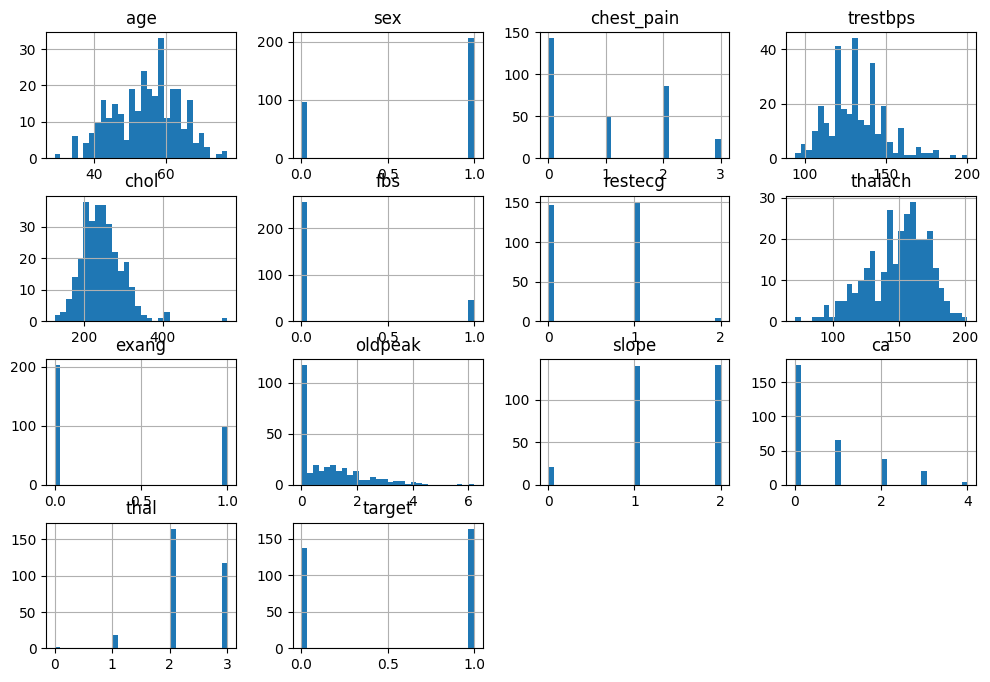

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_data.hist(figsize=(12, 8), bins=30)  # For numerical features
plt.show()


In [ ]:
my_data.skew()


,0
age,-0.203743
sex,-0.786120
chest_pain,0.493022
trestbps,0.716541
chol,1.147332
fbs,1.981201
restecg,0.169467
thalach,-0.532671
exang,0.737281
oldpeak,1.266173


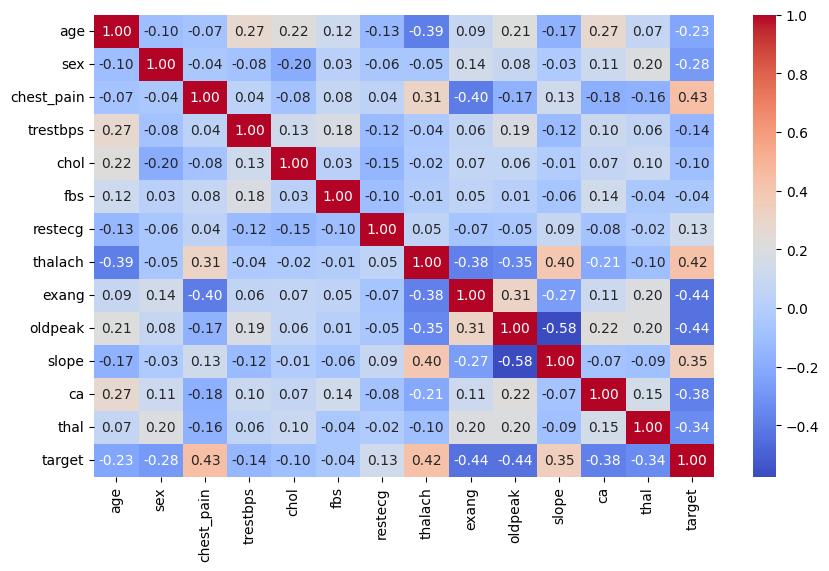

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# Normalize the values avoiding this way that the features with large values dominate others

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = my_data.drop('target', axis=1) # taking the data without the target column
y = my_data['target']  #

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)   #This will be a numpy-array
health_data = pd.DataFrame(scaled_data, columns=X.columns)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(health_data, y, test_size=0.2, random_state=42)  # dont forget that random_state could be any number!

In [ ]:
X_train.shape

(241, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
K=2


In [ ]:
# Time to apply the KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 10, 15, 20, 25, 29, 30, 33, 35, 37]  # Example k values to try
for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print(f"Accuracy for k={k}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for k={k}:", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for k={k}", confusion_matrix(y_test, y_pred))




Accuracy for k=1: 0.7377049180327869
Classification Report for k=1:               precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.72      0.72      0.72        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Confusion Matrix for k=1 [[24  8]
 [ 8 21]]
Accuracy for k=3: 0.7377049180327869
Classification Report for k=3:               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.71      0.76      0.73        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Confusion Matrix for k=3 [[23  9]
 [ 7 22]]
Accuracy for k=5: 0.7377049180327869
Classification Report for k=5:               precision    recall  f1-score   support


In [ ]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=37)

In [ ]:
y_pred = KNN.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.62      0.75        32
           1       0.70      0.97      0.81        29

    accuracy                           0.79        61
   macro avg       0.83      0.80      0.78        61
weighted avg       0.83      0.79      0.78        61

Confusion Matrix:
 [[20 12]
 [ 1 28]]


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for k=3 or k=5:\n", classification_report(y_test, y_pred))


Classification Report for k=3 or k=5:
               precision    recall  f1-score   support

           0       0.65      0.47      0.55        32
           1       0.55      0.72      0.63        29

    accuracy                           0.59        61
   macro avg       0.60      0.60      0.59        61
weighted avg       0.60      0.59      0.58        61



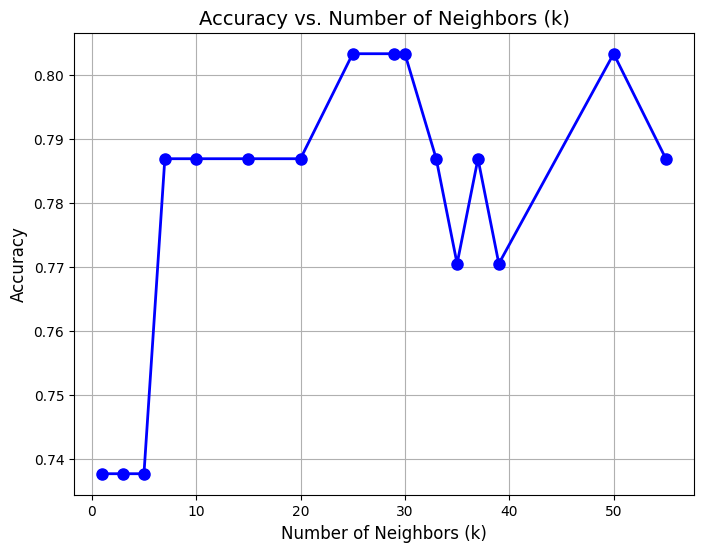

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to try
k_values = [1, 3, 5, 7, 10, 15, 20, 25, 29, 30, 33, 35, 37, 39, 50, 55]
accuracies = []

# Loop through k values, train the model, and calculate accuracy
for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Accuracy vs. Number of Neighbors (k)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()


Some conclusions regardint to the KNN for this classifier:
The accuracy reach its top when K= 3, 5
When K increase, the accuracy reduce.


As an alternative, we can use Logistic Regression which can perform well for Classification problems.


In [ ]:
X_train.head()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3
291,58,1,0,128,259,0,0,130,1,3.0,1,2,3
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.7704918032786885
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

Confusion Matrix:
 [[21 11]
 [ 3 26]]
